In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 데이터 불러오기
df = pd.read_excel('2020 ~ 2021 수업시간표.xlsx')
df

,교과목명,교수명,강의시간,강의실
0,[논어]이야기,문정우,"목1, 2",024-0158
1,20대를위한행복심리학,양난미,"수2, 3",024-0175
2,20대를위한행복심리학,양난미,"수2, 3",024-0171
3,GNU인성,최원석,"화8, 9",024-0171
4,GNU인성,배상정,"화8, 9",024-0173
...,...,...,...,...
955,환경과오염,하광수,"수2, 3",024-0273
956,환경과오염,하광수,"목1, 2",011-0401
957,환경과오염,하광수,"목3, 4",011-0401
958,회계입문,김새로나,"화5, 목6, 7",024-0260


In [2]:
# 요일과 교시 열 분리
df['강의시간'] = df['강의시간'].apply(lambda x: x.split(','))
df = df.explode('강의시간')
df['요일'] = df['강의시간'].str.extract('(\D+)')
df['교시'] = df['강의시간'].str.extract('(\d+)').astype(int)

# 값이 없는 행 결측값으로 변경 및 삭제
df['요일'].replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)

df = df[['교과목명', '교수명', '강의실', '요일', '교시']]
df

,교과목명,교수명,강의실,요일,교시
0,[논어]이야기,문정우,024-0158,목,1
1,20대를위한행복심리학,양난미,024-0175,수,2
2,20대를위한행복심리학,양난미,024-0171,수,2
3,GNU인성,최원석,024-0171,화,8
4,GNU인성,배상정,024-0173,화,8
...,...,...,...,...,...
957,환경과오염,하광수,011-0401,목,3
958,회계입문,김새로나,024-0260,화,5
958,회계입문,김새로나,024-0260,목,6
959,회계입문,서승주,024-0260,화,6


월    233.0
화    264.0
수    245.0
목    260.0
금    138.0
토     14.0
일      NaN
Name: 요일, dtype: float64


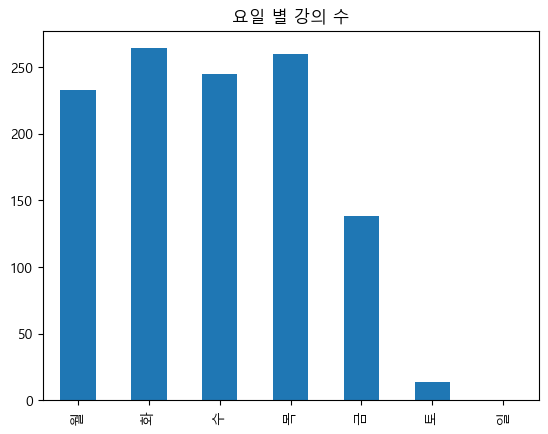

1     162
2     184
3     119
4      42
5     138
6     211
7      52
8     224
9      10
10      5
11      7
Name: 교시, dtype: int64


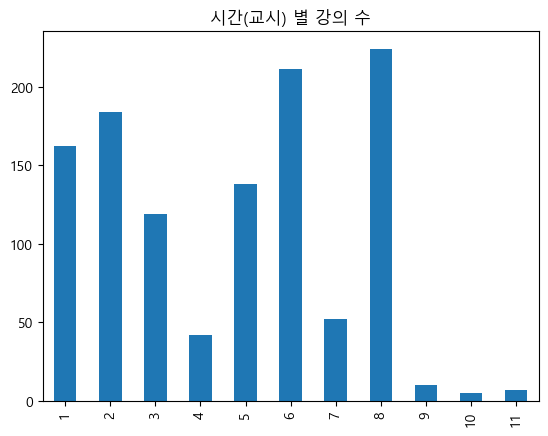

In [4]:
# 요일/교시 순서 정의
days = ['월', '화', '수', '목', '금', '토', '일']
times = [1,2,3,4,5,6,7,8,9,10,11]

# 요일 데이터 빈도수 출력
day_counts = df['요일'].value_counts(sort=False).reindex(days)
print(day_counts)

# 요일 데이터 빈도수 시각화
plt.rc('font', family='Malgun Gothic')
day_counts.plot(kind='bar')
plt.xticks(range(7), days)
plt.title('요일 별 강의 수')
plt.show()

# 교시 데이터 빈도수 출력
time_counts = df['교시'].value_counts(sort=False).reindex(times)
print(time_counts)

# 교시 데이터 빈도수 시각화
time_counts.plot(kind='bar')
plt.xticks(range(11), times)
plt.title('시간(교시) 별 강의 수')
plt.show()

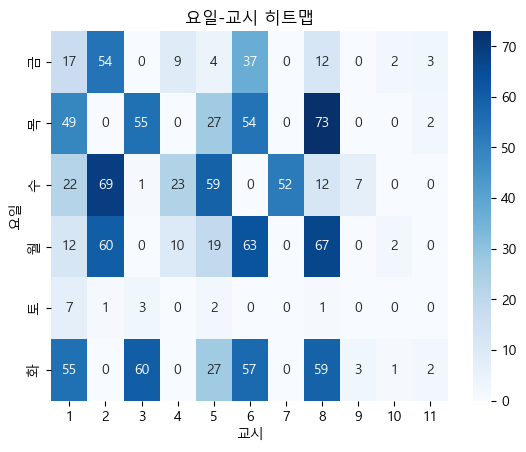

요일  교시  count
 목   8     73
 수   2     69
 월   8     67
 월   6     63
 월   2     60
 화   3     60
 수   5     59
 화   8     59
 화   6     57
 목   3     55


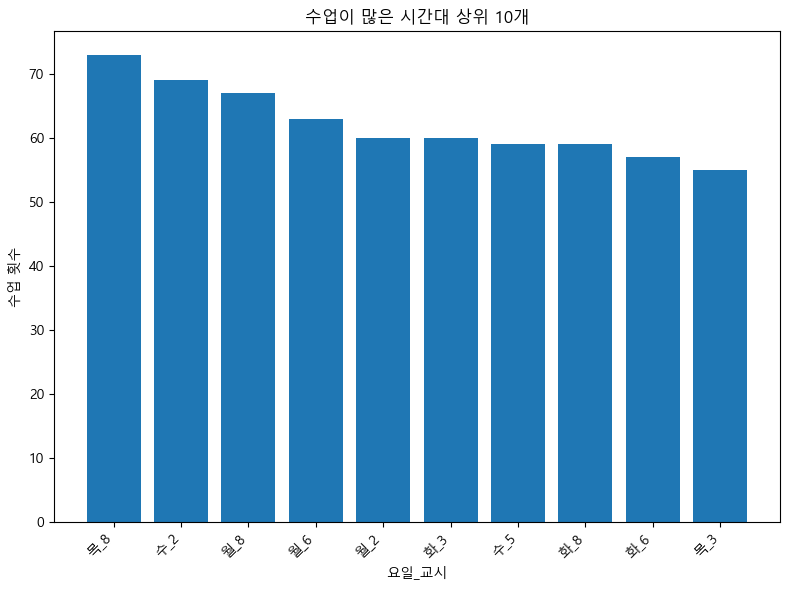

In [5]:
# 요일과 교시에 대한 교차표 생성
cross_tab = pd.crosstab(df['요일'], df['교시'])

# 히트맵 생성
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d')
plt.title('요일-교시 히트맵')
plt.show()

# 값이 높은 상위 10개 추출
stacked_cross_tab = cross_tab.stack().reset_index(name='count')
top_10 = stacked_cross_tab.nlargest(10, 'count')
print(top_10.to_string(index=False))

# 상위 10개 시각화
plt.figure(figsize=(8, 6))
plt.bar(x=top_10['요일'] + '_' + top_10['교시'].astype(str), height=top_10['count'])
plt.title('수업이 많은 시간대 상위 10개')
plt.xlabel('요일_교시')
plt.ylabel('수업 횟수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
# 저장하기
df.to_excel('2020 ~ 2021 수업시간표 - 요일,교시 분리.xlsx', index=False)